![](https://github.com/panda-kim/fastcampus/blob/main/images/main2.jpg?raw=1)

- 여러분의 판다스 공부를 도와줄 판다스 책이 출판되었습니다.

- [**파이썬의 엑셀 판다스 라이브러리** 목차 및 미리보기 링크](https://kimpanda.tistory.com/274)
# Ch03. 프로 야구 데이터를 통해 데이터프레임 다루기


> KBO 데이터를 이용해 이대호 선수의 일별 누적 장타율 구하기




## 1. 웹크롤링 결과를 데이터프레임으로 불러오기 (read_html)

- KBO 사이트의 이대호 선수 일별기록

[https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=71564](https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=71564)



- ✅ 왜 복사한 URL을 붙여넣으면 2025년 데이터로 바뀌는가?
👉 URL에 '연도(year)' 정보가 명시돼 있지 않기 때문이야.

📌 자세한 이유:
네가 복사한 URL:
https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=71564
이 URL은 선수 고유 ID만 포함돼 있고,
연도(2022/2025)나 리그(KBO/퓨처스) 등의 정보는 담겨 있지 않아.

따라서 브라우저에서 이 URL을 열면
KBO 웹사이트는 기본값인 **현재 연도(=2025)**로 자동 설정해서 데이터를 보여줘.

즉, 드롭다운 선택값은 URL로 전달되지 않고, 자바스크립트로 렌더링될 뿐이야.





**크롤링이란?**

- 웹페이지에서 데이터를 추출하는 행위
- 판다스에서는 read_html 함수로 가능하다
- 강사: 다만 표 데이터만 크롤링 할 수 있다.





> pandas read_html

pd.read_html(io, match='+', header=None, index_col=None)


---

웹페이지의 테이블을 데이터프레임으로 불러오는 함수. 리스트에 데이터프레임을 담아준다.
 하나의 웹페이지에 여러 개의 표가 있는 경우가 많아서 모두 데이터프레임으로 불러 리스트에 담아줍니다.

---


**io**

웹페이지의 경로명

---

**match** (인수는 문자열 혹은 정규표현식 / 기본값은 ‘.+’ )

여러 개의 테이블 중에서 특정 문자열을 포함한 테이블을 지정하는 인자. 기본값은 빈 문자열을 제외한 모든 문자열이다.(지정하지 않으면 문자열이 포함된 모든 테이블을 가져온다)

Ex) 만약 여러 개의 표 중에서 4월이 있는 표만 가져오려면

pd.read_html(경로명, match='4월')

---

**header** (인수는 정수, 정수의 리스트 / 기본값은 None)

columns를 지정하는 인자. 리스트로 지정하면 멀티 인덱스인 columns가 된다.

---

**index_col** (인수는 정수, 정수의 리스트 / 기본값은 None)

index를 지정하는 인자. 지정하지 않으면 RangeIndex가 index로 부여된다. 리스트로 지정하면 멀티 인덱스인 index가 된다.

---

[read_html 함수 설명 블로그](https://kimpanda.tistory.com/75) https://kimpanda.tistory.com/75

[read_html 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) https://pandas.pydata.org/docs/reference/api/pandas.read_html.html

In [ ]:
# 강의 준비코드
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행만 출력의 바뀐 코드

In [ ]:
# 해당 웹사이트의 모든 표를 데이터프레임으로 만들어 리스트에 담아준다
url = 'https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=71564'
dfs = pd.read_html(url)
dfs

[       4월  상대   AVG1   PA  AB   R   H  2B  3B  HR  RBI  SB  CS  BB  HBP  SO  \
 0   04.02  키움  0.250    4   4   0   1   0   0   0    1   0   0   0    0   0   
 1   04.03  키움  0.400    5   5   0   2   0   0   0    0   0   0   0    0   1   
 2   04.05  NC  0.500    5   4   0   2   0   0   0    0   0   0   1    0   0   
 ..    ...  ..    ...  ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..   
 22  04.29  LG  0.400    5   5   1   2   0   0   0    1   0   0   0    0   2   
 23  04.30  LG  0.500    4   4   0   2   0   0   0    0   0   0   0    0   0   
 24     합계  합계  0.356  100  90  13  32   2   0   2   10   0   0   7    1   9   
 
     GDP   AVG2  
 0     0  0.250  
 1     0  0.333  
 2     0  0.385  
 ..  ...    ...  
 22    0  0.349  
 23    0  0.356  
 24    4  0.356  
 
 [25 rows x 18 columns],
        5월  상대   AVG1  PA  AB  R   H  2B  3B  HR  RBI  SB  CS  BB  HBP  SO  \
 0   05.03  KT  0.250   4   4  0   1   0   0   0    0   0   0   0    0   2   
 1   05.04  KT  0.000   4   4  

In [ ]:
# 데이터프레임의 리스트에서 첫번째 데이터프레임만 불러올 때
dfs[0]

,4월,상대,AVG1,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG2
0,04.02,키움,0.250,4,4,0,1,0,0,0,1,0,0,0,0,0,0,0.250
1,04.03,키움,0.400,5,5,0,2,0,0,0,0,0,0,0,0,1,0,0.333
2,04.05,NC,0.500,5,4,0,2,0,0,0,0,0,0,1,0,0,0,0.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,04.29,LG,0.400,5,5,1,2,0,0,0,1,0,0,0,0,2,0,0.349
23,04.30,LG,0.500,4,4,0,2,0,0,0,0,0,0,0,0,0,0,0.356
24,합계,합계,0.356,100,90,13,32,2,0,2,10,0,0,7,1,9,4,0.356


In [ ]:
# dfs의 모든 데이터프레임의 날짜 열의 이름이 달라 concat로는 outer join을 한다
#concat() 함수는 배열로 입력해주는 데이터프레임들을 하나로 결합해준다.
#근데 5월부터는 NaN으로 채워져있다. 이유는 concat() 함수는 기본적으로 outer join이다.
# 각 데이터 프레임에서 날짜에 해당하는 열의 이름이 다르다(ex. 4월, 5월, 6월 등)
pd.concat(dfs)

,4월,상대,AVG1,PA,AB,R,H,2B,3B,HR,...,HBP,SO,GDP,AVG2,5월,6월,7월,8월,9월,10월
0,04.02,키움,0.25,4,4,0,1,0,0,0,...,0,0,0,0.250,NaN,NaN,NaN,NaN,NaN,NaN
1,04.03,키움,0.4,5,5,0,2,0,0,0,...,0,1,0,0.333,NaN,NaN,NaN,NaN,NaN,NaN
2,04.05,NC,0.5,5,4,0,2,0,0,0,...,0,0,0,0.385,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,NaN,NC,0.0,4,4,0,0,0,0,0,...,0,1,0,0.332,NaN,NaN,NaN,NaN,NaN,10.05
3,NaN,LG,0.25,4,4,0,1,1,0,0,...,0,0,2,0.331,NaN,NaN,NaN,NaN,NaN,10.08
4,NaN,합계,0.143,16,14,1,2,1,0,1,...,0,2,3,0.331,NaN,NaN,NaN,NaN,NaN,합계


In [ ]:
#위와 같은 문제를 해결하기 위해 맨 첫째 줄을 index_col로 지정하려고 함
# 열의 이름이 다른 날짜에 해당 하는 열을 index로 만들어 dfs를 부르고 concat를 하자
dfs = pd.read_html(url, index_col=0)
pd.concat(dfs)

,상대,AVG1,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG2
04.02,키움,0.25,4,4,0,1,0,0,0,1,0,0,0,0,0,0,0.250
04.03,키움,0.4,5,5,0,2,0,0,0,0,0,0,0,0,1,0,0.333
04.05,NC,0.5,5,4,0,2,0,0,0,0,0,0,1,0,0,0,0.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.05,NC,0.0,4,4,0,0,0,0,0,0,0,0,0,0,1,0,0.332
10.08,LG,0.25,4,4,0,1,1,0,0,1,0,0,0,0,0,2,0.331
합계,합계,0.143,16,14,1,2,1,0,1,4,0,0,2,0,2,3,0.331


In [ ]:
# 결과를 변수 df_ex1으로 지정하자 (메인 프로젝트 코드)
df_ex1 = pd.concat(dfs)
df_ex1

,상대,AVG1,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG2
04.02,키움,0.25,4,4,0,1,0,0,0,1,0,0,0,0,0,0,0.250
04.03,키움,0.4,5,5,0,2,0,0,0,0,0,0,0,0,1,0,0.333
04.05,NC,0.5,5,4,0,2,0,0,0,0,0,0,1,0,0,0,0.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.05,NC,0.0,4,4,0,0,0,0,0,0,0,0,0,0,1,0,0.332
10.08,LG,0.25,4,4,0,1,1,0,0,1,0,0,0,0,0,2,0.331
합계,합계,0.143,16,14,1,2,1,0,1,4,0,0,2,0,2,3,0.331


## 2. 데이터프레임의 정보 파악하기

<img src=https://i.ibb.co/9qVKL78/01.png, width=400>

info : 데이터 프레임의 많은 정보를 알려주는 함수

shape : 데이터 프레임의 크기를 알려주는 속성

dtypes : 각 열의 dtype을 시리즈로 반환하는 속성

describe : 숫자로 된 열들의 간단한 통계들을 제공하는 함수

unique : 열의 고유값들을 반환하는 함수

In [ ]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행만 출력의 바뀐 코드
pd.options.display.float_format = '{:.2f}'.format
url = 'https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=71564'
dfs = pd.read_html(url, index_col=0)
df_ex1 = pd.concat(dfs)
df_ex1

,상대,AVG1,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG2
04.02,키움,0.25,4,4,0,1,0,0,0,1,0,0,0,0,0,0,0.25
04.03,키움,0.40,5,5,0,2,0,0,0,0,0,0,0,0,1,0,0.33
04.05,NC,0.50,5,4,0,2,0,0,0,0,0,0,1,0,0,0,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.05,NC,0.00,4,4,0,0,0,0,0,0,0,0,0,0,1,0,0.33
10.08,LG,0.25,4,4,0,1,1,0,0,1,0,0,0,0,0,2,0.33
합계,합계,0.14,16,14,1,2,1,0,1,4,0,0,2,0,2,3,0.33


index : 시리즈나 데이터 프레임의 index를 확인하는 속성

columns : 데이터 프레임의 columns를 확인하는 속성

values : 시리즈나 데이터 프레임의 values를 확인하는 속성

---
**속성(attribute)**과 **함수(function)**의 차이

속성은 인수를 입력받지 않는다

쉽게 생각해서 소괄호 없이 인수 넣지 않는 함수를 속성이라 여겨도 된다

In [ ]:
# index 확인하기
# 각 표의 '합계'까지 포함되어버렸다. 이 '합계'는 지워야 한다.

df_ex1.index

Index(['04.02', '04.03', '04.05', '04.06', '04.07', '04.08', '04.09', '04.10',
       '04.12', '04.14',
       ...
       '09.23', '09.24', '09.29', '09.30', '합계', '10.02', '10.03', '10.05',
       '10.08', '합계'],
      dtype='object', length=149)

In [ ]:
# columns 확인하기
df_ex1.columns

Index(['상대', 'AVG1', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS',
       'BB', 'HBP', 'SO', 'GDP', 'AVG2'],
      dtype='object')

In [ ]:
df_ex1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 04.02 to 합계
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상대      149 non-null    object 
 1   AVG1    149 non-null    object 
 2   PA      149 non-null    int64  
 3   AB      149 non-null    int64  
 4   R       149 non-null    int64  
 5   H       149 non-null    int64  
 6   2B      149 non-null    int64  
 7   3B      149 non-null    int64  
 8   HR      149 non-null    int64  
 9   RBI     149 non-null    int64  
 10  SB      149 non-null    int64  
 11  CS      149 non-null    int64  
 12  BB      149 non-null    int64  
 13  HBP     149 non-null    int64  
 14  SO      149 non-null    int64  
 15  GDP     149 non-null    int64  
 16  AVG2    149 non-null    float64
dtypes: float64(1), int64(14), object(2)
memory usage: 21.0+ KB


In [ ]:
# 데이터 프레임 크기 파악하기
df_ex1.shape

(149, 17)

In [ ]:
# 데이터 프레임의 행의 수(주로 코드에 넣을 때)
df_ex1.shape[0]

149

In [ ]:
# 데이터 프레임 각 열의 dtype
df_ex1.dtypes

상대       object
AVG1     object
PA        int64
         ...   
SO        int64
GDP       int64
AVG2    float64
Length: 17, dtype: object

In [ ]:
# 숫자 열들의 기본적인 통계자료
pd.options.display.max_rows = 8 # 판다스 버전업에 따라 8행만 출력의 바뀐 코드
pd.options.display.float_format = '{:.2f}'.format
df_ex1.describe()

,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG2
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,7.93,7.25,0.71,2.40,0.31,0.00,0.31,1.36,0.00,0.00,0.58,0.03,0.75,0.35,0.34
std,18.13,16.59,1.78,5.71,0.88,0.00,0.82,3.36,0.00,0.00,1.44,0.16,1.83,0.87,0.02
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24
25%,4.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33
50%,4.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.34
75%,5.00,4.00,1.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.35
max,100.00,93.00,13.00,33.00,7.00,0.00,5.00,22.00,0.00,0.00,9.00,1.00,11.00,5.00,0.39


In [ ]:
# 고유값
df_ex1['AB'].unique()

array([ 4,  5,  3,  1, 90, 93,  6,  0,  2, 88, 82, 85, 14])

## 3. 데이터프레임의 인덱싱과 슬라이싱 (loc와 iloc)

<img src=https://i.ibb.co/zJYNK4q/image.jpg, width=600>

인덱싱(indexing)과 슬라이싱(slicing)


배열 전체에서 일부를 가져오는 기법\
지정된 것을 가져오는 것이 인덱싱(indexing)
구간을 가져오는 것이 슬라이싱(slicing)

---
##판다스에서의 인덱싱과 슬라이싱


대괄호 인덱싱 :
레이블(이름)로 인덱싱 / 열만 인덱싱 가능, 행만 슬라이싱 가능 / 행과 열을 동시에 불가능

---
loc 인덱싱 :
레이블(이름)로 인덱싱 / 행과 열 모두 인덱싱과 슬라이싱 가능 / 행과 열을 동시에 가능

---
iloc 인덱싱 :
로케이션으로 인덱싱 / 행과 열 모두 인덱싱과 슬라이싱 가능 / 행과 열을 동시에 가능



In [ ]:
# 실습 준비코드
data = [[1, 3, 1, 0, 4, 1], [6, 5, 8, 9, 0, 3],[7, 6, 2, 3, 4, 8], [9, 0, 2, 0, 6, 5]]
df = pd.DataFrame(data, index=list('가나다라'), columns=list('ABCDEF'))
df

,A,B,C,D,E,F
가,1,3,1,0,4,1
나,6,5,8,9,0,3
다,7,6,2,3,4,8
라,9,0,2,0,6,5


In [ ]:
# 대괄호 인덱싱 (각기 실행해보세요)
# 대괄호 인덱싱은 열만 인덱싱 가능하고, 슬라이싱은 행만 가능하다
# 이 부분이 복잡하니까 주의하라고 강사가 말함.

# df['A'] # A열
# df[['A', 'C']] # A열과 C열
df['가':'다'] # 가행부터 다행까지 슬라이싱

,A,B,C,D,E,F
가,1,3,1,0,4,1
나,6,5,8,9,0,3
다,7,6,2,3,4,8


In [ ]:
# loc 인덱싱 (각기 실행해보세요)
# df.loc['가', 'A'] # 가 행의 A열
# df.loc[['가', '나'], ['A', 'C']] # 가, 나 행과 A열과 C열. 대괄호 두 번인 거 주의.
# df.loc[['가', '나'], ['A', 'B', 'C']] # 가, 나 행과 A열과 B열과 C열 (인덱싱)
# df.loc[['가', '나'], 'A':'C'] # 가, 나 행과 A열과 B열과 C열 (슬라이싱)
# df.loc[['가', '나'], 'B':] # 가, 나 행과 B열에서 끝까지. 'B :' 가 아니다!!
# df.loc['가':'다', :] # 가행부터 다행까지 열은 전부
df.loc['가':'다'] # 가행부터 다행까지 열은 전부

,A,B,C,D,E,F
가,1,3,1,0,4,1
나,6,5,8,9,0,3
다,7,6,2,3,4,8


In [ ]:
# iloc 인덱싱 (각기 실행해보세요)
# df.iloc[0, :] # 첫번째 행. 시리즈는 1차원이다.
# df.iloc[0] # 첫번째 행
# df.iloc[:3, 2:] # 시작부터 다행까지 C열부터 끝까지
df.iloc[[0, 1], 2:] # 가행과 나행 C열부터 끝까지

,C,D,E,F
가,1,0,4,1
나,8,9,0,3


> pandas drop

데이터 프레임의 행이나 열을 삭제하는 함수

---
**labels** (인수는 레이블 혹은 리스트)

드롭할 행의 레이블(이름)이나 열의 레이블. 복수라면 리스트 로 묶어서 입력한다.

---
**axis** (인수는 0 또는 1/기본값은 0)

삭제할 부분이 행인지 열인지를 지정하는 인자. 기본값은 0이고 행을 삭제한다

---
**level** (멀티 인덱스의 레벨 / 기본값은 None)

멀티인덱스일 때 삭제할 레벨을 지정하는 인자

---
[drop 함수 설명 블로그](https://kimpanda.tistory.com/76)

[drop 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)


In [ ]:
# D열만 빼고 모두 가져오기
# df[['A', 'B', 'C', 'E', 'F']] # 인덱싱으로는 번거롭다
df.drop('D', axis=1) # 삭제가 더 편리하다

,A,B,C,E,F
가,1,3,1,4,1
나,6,5,8,0,3
다,7,6,2,4,8
라,9,0,2,6,5


In [ ]:
# 행은 나와 다 그리고 열은 C열만 빼고 다 가져오기
df.loc[['나', '다'], ['A', 'B', 'D', 'E', 'F']]

,A,B,D,E,F
나,6,5,9,0,3
다,7,6,3,4,8


In [ ]:
# 인덱싱만 하는것보다 인덱싱과 drop 함수를 섞는 것이 편리할 때가 많다
df.loc[['나', '다']].drop('C', axis=1)

,A,B,D,E,F
나,6,5,9,0,3
다,7,6,3,4,8


인덱싱과 슬라이싱에 대해서 더 공부가 필요한 분들은 아래 강의를 참고하세요



*   [엑셀투파이썬 채널 인덱싱과 슬라이싱 강의](https://youtu.be/W2KYhekdtfU)

In [ ]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행만 출력의 바뀐 코드
pd.options.display.float_format = '{:.3f}'.format
url = 'https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=71564'
dfs = pd.read_html(url, index_col=0)
df_ex1 = pd.concat(dfs)
df_ex1

,상대,AVG1,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,AVG2
04.02,키움,0.250,4,4,0,1,0,0,0,1,0,0,0,0,0,0,0.250
04.03,키움,0.400,5,5,0,2,0,0,0,0,0,0,0,0,1,0,0.333
04.05,NC,0.500,5,4,0,2,0,0,0,0,0,0,1,0,0,0,0.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.05,NC,0.000,4,4,0,0,0,0,0,0,0,0,0,0,1,0,0.332
10.08,LG,0.250,4,4,0,1,1,0,0,1,0,0,0,0,0,2,0.331
합계,합계,0.143,16,14,1,2,1,0,1,4,0,0,2,0,2,3,0.331


In [ ]:
# 장타율을 구하는데 필요한 열만 인덱싱하고 합계행을 삭제한다
# 장타율 = 루타수 / 타수
# 루타수 = (안타 × 1) + (2루타 × 2) + (3루타 × 3) + (홈런 × 4)

# AB // At Bats (타수) // 타석 중 안타·아웃 등 결과가 나온 타격 시도 횟수. 단, 볼넷·사구·희생번트 등은 제외
# H // Hits (안타) // 타자가 공을 쳐서 출루에 성공한 횟수. 단타·2루타·3루타·홈런 모두 포함
# 2B // Doubles (2루타) // 2루까지 도달한 안타 수 (직접 타격으로 도달해야 함)
# 3B // Triples (3루타) // 3루까지 도달한 안타 수
# HR // Home Runs (홈런) // 타자가 한 번에 홈까지 도달한 안타 수 (홈런 = 4루타)

df_ex2 = df_ex1[['AB', 'H', '2B', '3B', 'HR']].drop('합계')
df_ex2

,AB,H,2B,3B,HR
04.02,4,1,0,0,0
04.03,5,2,0,0,0
04.05,4,2,0,0,0
...,...,...,...,...,...
10.03,2,1,0,0,1
10.05,4,0,0,0,0
10.08,4,1,1,0,0


## 4. 데이터프레임과 시리즈의 연산

#<img src=https://i.ibb.co/GQ5cZxj/image.jpg, width=600>

In [ ]:
### 시리즈와 상수의 연산
# import pandas as pd
# s1 = pd.Series([0, 1, 2, 3], index=['A', 'B', 'C', 'D'])

# 나는 위의 결과물을 내기 위해서 s1 =  [1, 2, 3, 4]라고 썼는데,
#s1은 단순 리스트가 아니라 pandas의 Series 객체이기 때문에 단순 리스트로 표현할 수 없다는 걸 간과했어

# s1 * 2 #를 하면 각 시리즈의 모든 원소에 상수 2가 곱해진다. 0, 2, 4, 6 이렇게.

# Series에서는 [0,1,2,3]이 값들, ['A','B','C','D']가 인덱스다.
# 컬럼이란 말은 DataFrame에서만 쓴다!

In [ ]:
### 시리즈와 시리즈의 연산
# import pandas as pd
# s1 = pd.Series([0, 1, 2, 3], index=['A', 'B', 'C', 'D'])
# s2 = pd.Series([2, 3, 4, 5], index=['A', 'B', 'C', 'D'])

# s1 + s2 의 결과는 동일한 index끼리 연산한다. 2, 4, 6, 8 이런 식으로


In [ ]:
# 실습준비 코드
import pandas as pd
s1 = pd.Series([0, 1, 2, 3], index=list('ABCD'))
s2 = pd.Series([2, 3, 4, 5], index=list('ABCD'))
s3 = pd.Series([2, 3, 4], index=list('CAD'))
df1 = pd.DataFrame([[50, 40], [60, 70], [90, 70], [40, 20]],
                   index=list('ABCD'), columns=['국어', '영어'])
df2 = pd.DataFrame([[50, 60], [40, 70], [80, 70], [40, 90]],
                   index=list('BADC'), columns=['국어', '영어'])

In [ ]:
# 시리즈와 스칼라(상수)의 연산 (각각 실행해보세요)
s1 + 1
s1 * 2

A    0
B    2
C    4
D    6
dtype: int64

In [ ]:
# 시리즈와 스칼라(상수)의 비교연산
s1 > 2

A    False
B    False
C    False
D     True
dtype: bool

In [ ]:
# 시리즈와 시리즈의 연산
s1 + s2

A    2
B    4
C    6
D    8
dtype: int64

In [ ]:
# 시리즈와 시리즈의 연산 (인덱스의 구성이 서로 다를 때)
s1 + s3

A   3.000
B     NaN
C   4.000
D   7.000
dtype: float64

In [ ]:
# 데이터 프레임과 스칼라(상수)의 연산 (각각 실행해 보세요)
df1 + 1
df1 == 70

,국어,영어
A,False,False
B,False,True
C,False,True
D,False,False


In [ ]:
# 데이터 프레임과 데이터 프레임의 연산
df1 + df2

,국어,영어
A,90,110
B,110,130
C,130,160
D,120,90


In [ ]:
# 데이터 프레임의 열간의 연산(시리즈의 연산)
df1['국어'] + df1['영어']

A     90
B    130
C    160
D     60
dtype: int64

연산에 대해서 더 공부가 필요한 분들은 아래 강의를 참고하세요



*   [엑셀투파이썬 채널 연산 강의](https://youtu.be/iZ6v1DSmrHU)

## 5. 열 다루기

In [ ]:
# 실습준비 코드
import pandas as pd
dict1 = {'A': 1, 'B': 2, 'C': 4}
# dict1에 D:5를 추가하고 싶다면 이렇게 적어라 ->  dict1['D']=5
# 이후 다시 dict1을 출력하면 {'A': 1, 'B': 2, 'C': 4, 'D' :5}

df1 = pd.DataFrame([[50, 40], [60, 70], [90, 70], [40, 20]],
                   index=list('ABCD'), columns=['국어', '영어'])
df2 = pd.DataFrame([[50, 60], [40, 70], [80, 70], [40, 90]],
                   index=list('BADC'), columns=['국어', '영어'])
df1

,국어,영어
A,50,40
B,60,70
C,90,70
D,40,20


데이터 프레임에서 열 다루기

1.대괄호에 레이블(이름)을 넣으면 열을 반환한다

2.대괄호에 존재하지 않는 레이블을 넣고 값을 부여하면 열이 생성된다

3.대괄호에 존재하는 레이블을 넣고 값을 부여하면 열이 수정된다



In [ ]:
# 수학 열 만들기
df1['수학'] = 'pass'
df1

,국어,영어,수학
A,50,40,pass
B,60,70,pass
C,90,70,pass
D,40,20,pass


In [ ]:
# 열 수정하기
df1['수학'] = '-'
df1

,국어,영어,수학
A,50,40,-
B,60,70,-
C,90,70,-
D,40,20,-


In [ ]:
# 열 수정하기
df1['수학'] = [10, 20, 30, 40]
df1

#단 df1['수학'] = [10, 20, 30, 40, 50]처럼
# 리스트를 배정할 때 크기가 다르면 에러가 난다.

,국어,영어,수학
A,50,40,10
B,60,70,20
C,90,70,30
D,40,20,40


In [ ]:
# 시리즈를 배정하기
s1 = pd.Series([10, 20, 30, 40], index=list('ABCD'))
df1['수학'] = s1
df1

# s1 = pd.Series([10, 20, 30, 40, 50], index=list('ABCDE'))
# df1['수학'] = s1
# df1
# 위의 출력값은 나오긴 한다. 다만 인덱스 E와 50은 출력되지 않는다.
#시리즈는 해당 인덱스에 맞춰 배정되기 때문이다.

,국어,영어,수학
A,50,40,10
B,60,70,20
C,90,70,30
D,40,20,40


In [ ]:
# 복수의 열 한번에 만들기
df1[['과학', '사회']] = 'pass'
df1

,국어,영어,수학,과학,사회
A,50,40,10,pass,pass
B,60,70,20,pass,pass
C,90,70,30,pass,pass
D,40,20,40,pass,pass


In [ ]:
# 열간의 연산으로 열 만들기
df2['총점'] = df2['국어'] + df2['영어']
df2

,국어,영어,총점
B,50,60,110
A,40,70,110
D,80,70,150
C,40,90,130


열다루기에 대해서 더 공부가 필요한 분들은 아래 강의를 참고하세요



*   [엑셀투파이썬 채널 열 강의](https://youtu.be/32ibROxrS3Y)

In [ ]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행만 출력의 바뀐 코드
pd.options.display.float_format = '{:.3f}'.format # 소수점 세자리까지 출력옵션
url = 'https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=71564'
dfs = pd.read_html(url, index_col=0)
df_ex1 = pd.concat(dfs)
df_ex2 = df_ex1[['AB', 'H', '2B', '3B', 'HR']].drop('합계')
df_ex2

,AB,H,2B,3B,HR
04.02,4,1,0,0,0
04.03,5,2,0,0,0
04.05,4,2,0,0,0
...,...,...,...,...,...
10.03,2,1,0,0,1
10.05,4,0,0,0,0
10.08,4,1,1,0,0


In [ ]:
#장타율 = 루타수 / 타수
# 루타수 = (안타 × 1) + (2루타 × 2) + (3루타 × 3) + (홈런 × 4)

#장타율을 구하려면 먼저 루타수를 구해야 한다
# 루타 열을 만들자

df_ex2['루타'] = df_ex2['H'] + (df_ex2['2B'] * 2) + (df_ex2['3B'] * 3) + (df_ex2['HR'] * 4)
df_ex2

,AB,H,2B,3B,HR,루타
04.02,4,1,0,0,0,1
04.03,5,2,0,0,0,2
04.05,4,2,0,0,0,2
...,...,...,...,...,...,...
10.03,2,1,0,0,1,5
10.05,4,0,0,0,0,0
10.08,4,1,1,0,0,3


## 6. 데이터 프레임에 각종 통계함수 적용하기

<img src=https://i.ibb.co/3CJXHrF/02.jpg, width=400>

📊 집계 함수 (aggregate function)란?:

우리가 흔히 생각하는 각종 통계 함수를 의미한다.

---
예시:
데이터 [2, 3, 4, 5]에 대해

mean: 3.5

sum: 14

count: 4

max: 5

---
👉 집계 함수란?

그룹의 값을 하나로 리턴해주는 차원 축소 함수를 뜻하며,
넓은 의미에서 모두 집계 함수라고 할 수 있다.

---
🔑 핵심 정리
여러 값 → 하나의 요약된 결과값을 반환

pandas에서 .groupby()와 함께 자주 사용됨

In [ ]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행만 출력의 바뀐 코드
pd.options.display.float_format = '{:.3f}'.format # 소수점 세자리까지 출력옵션
url = 'https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=71564'
dfs = pd.read_html(url, index_col=0)
df_ex1 = pd.concat(dfs)
df_ex2 = df_ex1[['AB', 'H', '2B', '3B', 'HR']].drop('합계')
df_ex2['루타'] = df_ex2['H'] + (df_ex2['2B'] * 2) + (df_ex2['3B'] * 3) + (df_ex2['HR'] * 4)
df_ex2

,AB,H,2B,3B,HR,루타
04.02,4,1,0,0,0,1
04.03,5,2,0,0,0,2
04.05,4,2,0,0,0,2
...,...,...,...,...,...,...
10.03,2,1,0,0,1,5
10.05,4,0,0,0,0,0
10.08,4,1,1,0,0,3


In [ ]:
# df_ex2의 윗 다섯 줄을 따로 df로 지정하자
df = df_ex2.head(5).copy()
df

,AB,H,2B,3B,HR,루타
04.02,4,1,0,0,0,1
04.03,5,2,0,0,0,2
04.05,4,2,0,0,0,2
04.06,4,0,0,0,0,0
04.07,4,0,0,0,0,0


In [ ]:
# 각 열의 합
# sum은 차원축소 함수 중 하나이기 때문에 데이터프레임을 시리즈로 만든다.
# 시리즈는 1차원이고 출력만 세워서 보여주는 것이다.
df.sum()

AB    21
H      5
2B     0
3B     0
HR     0
루타     5
dtype: int64

In [ ]:
# 각 열의 평균
df.mean()

AB   4.200
H    1.000
2B   0.000
3B   0.000
HR   0.000
루타   1.000
dtype: float64

In [ ]:
# 각 행의 합. axis=1을 지정해주면 된다. 열 방향으로 sum 함수 진행하니까 각 행의 합
df.sum(axis=1)

04.02    6
04.03    9
04.05    8
04.06    4
04.07    4
dtype: int64

In [ ]:
# 누적합
df.cumsum()

,AB,H,2B,3B,HR,루타
04.02,4,1,0,0,0,1
04.03,9,3,0,0,0,3
04.05,13,5,0,0,0,5
04.06,17,5,0,0,0,5
04.07,21,5,0,0,0,5


In [ ]:
# 프로젝트 변수인 df_ex2에 장타율 열 생성
df_ex2['누적루타'] = df_ex2['루타'].cumsum()
df_ex2['누적타수'] = df_ex2['AB'].cumsum()
df_ex2['slg'] = df_ex2['누적루타'] / df_ex2['누적타수']
df_ex2

#ctrl+shif+L = 변수 일괄 변경 기능

,AB,H,2B,3B,HR,루타,누적루타,누적타수,slg
04.02,4,1,0,0,0,1,1,4,0.250
04.03,5,2,0,0,0,2,3,9,0.333
04.05,4,2,0,0,0,2,5,13,0.385
...,...,...,...,...,...,...,...,...,...
10.03,2,1,0,0,1,5,314,532,0.590
10.05,4,0,0,0,0,0,314,536,0.586
10.08,4,1,1,0,0,3,317,540,0.587


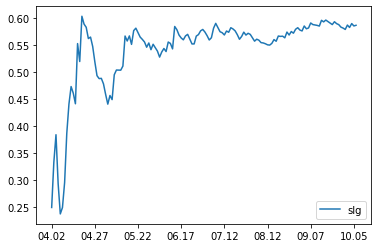

In [ ]:
# 장타율 시각화 하기
df_ex2.plot(y='slg')

## 7. 요약강의

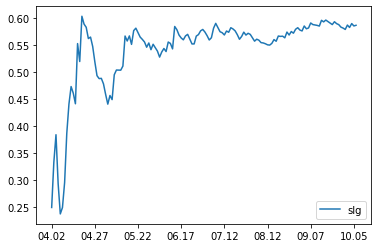

In [ ]:
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행만 출력의 바뀐 코드
pd.options.display.float_format = '{:.3f}'.format # 소수점 세자리까지 출력옵션

# 해당 웹사이트의 모든 표를 데이터프레임으로 만들어 리스트에 담아준다
url = 'https://www.koreabaseball.com/Record/Player/HitterDetail/Daily.aspx?playerId=71564'
dfs = pd.read_html(url, index_col=0)
#웹페이지에서 데이터프레임을 불러오는 함수는 pd.read_html()
#index_col=0을 적어야 인덱스0번 컬럼인 4월이 인덱스로 변경된다.

# 리스트의 모든 데이터프레임 결합하기. concat()운 기본적으로 outer join
df_ex1 = pd.concat(dfs)

# 일부 열만 인덱싱하고 합계 행 삭제하기
df_ex2 = df_ex1[['AB', 'H', '2B', '3B', 'HR']].drop('합계')

# 연산해서 열 만들기
df_ex2['루타'] = df_ex2['H'] + (df_ex2['2B'] * 2) + (df_ex2['3B'] * 3) + (df_ex2['HR'] * 4)
df_ex2['누적루타'] = df_ex2['루타'].cumsum()
df_ex2['누적타수'] = df_ex2['AB'].cumsum()
df_ex2['slg'] = df_ex2['누적루타'] / df_ex2['누적타수']

# 판다스의 시각화
df_ex2.plot(y='slg')

**참고 사이트**

판다스 공식 문서 [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)

강사 김판다의 블로그 [https://kimpanda.tistory.com](https://kimpanda.tistory.com)

강사 김판다의 유튜브 채널 엑셀투파이썬 [https://www.youtube.com/channel/UCKsPvuqR7BucXi7umcUlmzg](https://www.youtube.com/channel/UCKsPvuqR7BucXi7umcUlmzg)